# Course Description
Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. Or perhaps you have a set of texts, such as wikipedia pages, and you wish to segment them into categories based on their content. This is the world of unsupervised learning, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data. Unsupervised learning encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. In this course, you'll learn the fundamentals of unsupervised learning and implement the essential algorithms using scikit-learn and scipy. You will learn how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the course by building a recommender system to recommend popular musical artists.
#### Instructor: Ben Wilson
## Module 1. Clustering for dataset exploration
Learn how to discover the underlying groups (or "clusters") in a dataset. By the end of this chapter, you'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.Clustering for dataset exploration

### Unsupervised Learning
Unsupervised ML is class of Machine Learning algorithms that deals with finding pattern in data (clustering) and use this pattern to represent the data in compressed form (Dimensionality Reduction).
<br>Example: **Clustering** customer by their purchase.</br>

#### K Means Clustering: Iris Dataset

In [146]:
# import packages
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

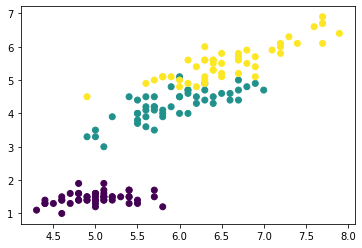

In [147]:
# Instantiate load_iris
iris = load_iris()

# Create dataset
iris_data = iris['data']
iris_target = iris["target"]

# Scatter Plot to view number of clusters
plt.scatter(iris_data[:,0], iris_data[:,2], c = iris_target)

It is pretty much clear that there should be 3 clusters in this dataset.

In [148]:
from sklearn.cluster import KMeans

# Instantiate the model
model = KMeans(n_clusters = 3)

# fit 
model.fit(iris_data)

# predict
pred_labels = model.predict(iris_data)
print(pred_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Evaluating a clustering

In [149]:
import pandas as pd

species = []
for s in iris["target"]:
    if s == 0:
        species.append('setosa')
    if s == 1:
        species.append('versicolor')
    if s == 2:
        species.append('verginica')

df = pd.DataFrame({'labels': pred_labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species']) 
ct

species,setosa,verginica,versicolor
labels,,,
0,0,14,48
1,50,0,0
2,0,36,2


#### Inference
Setosa are properly clustered, whereas there is some overlap between verginica and versicolor as it was evident from the scatter plot also.

### Clustering Quality
**Inertia** is the measure of how spread out the clusters are. In other words, it deals with intra-cluster distance. Lower the intertia better is the clustering.

#### How to choose number of clusters
* A good clustering has tight clusters (so low inertia), but not too many clusters! 
* Choose an "elbow" in the inertia plot, where inertia begins to decrease more slowly

Text(0.5, 1.0, 'Elbow Plot')

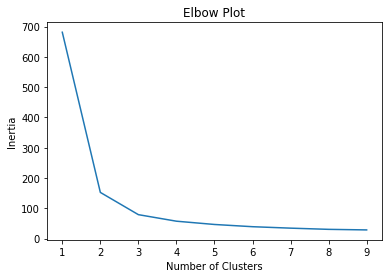

In [64]:
inertia = []
for k in range(1, 10):
    model = KMeans(n_clusters = k)
    model.fit(iris_data)
    inertia.append(model.inertia_)

plt.plot(np.arange(1, 10), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

After cluster number = 3, the intertia is dropping slowly.

### Piedmont wines dataset
178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera

In [150]:
# import packages
wines = pd.read_csv(r"C:\Users\ashupatel\Desktop\Office\Work\CogTax\DataCamp\wine.csv")
wines.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [151]:
# create Data and label
wine_data = wines.drop(["class_label", "class_name"], axis = 1)
wines_label = wines.iloc[:, 1]

# Instantiate the model
model = KMeans(n_clusters = 3)
labels = model.fit_predict(wine_data)

# Evaluate the performance
df = pd.DataFrame({'labels': labels, 'wines_label': wines_label})
ct = pd.crosstab(df["labels"], df["wines_label"])
print(ct)

wines_label  Barbera  Barolo  Grignolino
labels                                  
0                  0      46           1
1                 19       0          50
2                 29      13          20


The performance doesn't look impressive this time. One possible reason for this may be **Feature Variance**. Let's standardize the data and try to cluster then.

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Instantiate
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, kmeans)

# Fit
pipeline.fit(wine_data)

# predict
labels = pipeline.predict(wine_data)

# Evaluate the performance
df = pd.DataFrame({'labels': labels, 'wines_label': wines_label})
ct = pd.crosstab(df["labels"], df["wines_label"])
print(ct)

wines_label  Barbera  Barolo  Grignolino
labels                                  
0                  0       0          65
1                 48       0           3
2                  0      59           3


Standardizing the data does help.

### Practise Problems

How many clusters?
You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

In [153]:
import numpy as np
points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

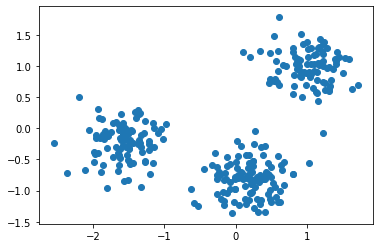

In [154]:
plt.scatter(points[:, 0], points[:, 1])

The scatter plot suggests that there are 3 distinct clusters.

#### Clustering 2D points
From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

In [155]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

new_points = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[1 0 2 1 0 1 0 0 0 2 1 0 0 2 2 0 2 2 0 0 2 0 1 0 1 2 0 2 2 1 1 0 0 0 2 1 0
 0 1 0 2 1 1 2 1 0 2 2 0 0 0 0 2 2 1 1 2 2 2 1 1 0 0 0 1 0 2 0 1 2 1 1 1 0
 1 2 2 1 0 2 1 2 1 0 2 0 2 1 0 0 0 1 0 0 1 2 2 2 2 1 0 1 2 2 1 1 0 1 2 2 1
 2 2 2 0 0 0 0 2 2 0 1 0 2 0 1 2 0 2 2 0 2 0 2 1 0 1 1 0 2 1 0 1 1 2 0 0 1
 2 1 2 0 1 2 2 1 2 0 0 2 0 2 2 0 0 1 0 0 2 1 2 1 1 0 1 0 0 1 1 2 1 1 1 2 0
 0 1 2 1 2 2 0 0 0 1 0 0 0 2 2 1 0 1 1 1 2 0 0 0 0 0 0 2 2 0 2 2 2 2 0 2 2
 0 0 1 2 1 1 2 1 2 1 2 0 0 2 0 0 0 2 1 1 2 0 0 2 0 2 2 0 2 2 1 2 1 1 1 0 2
 2 2 1 0 1 2 1 2 2 0 1 1 1 2 0 0 0 1 0 2 2 0 1 1 2 1 1 2 1 0 1 2 2 2 2 0 2
 2 0 0 1]


You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. In the next exercise, you'll inspect your clustering with a scatter plot!

#### Inspect your clustering

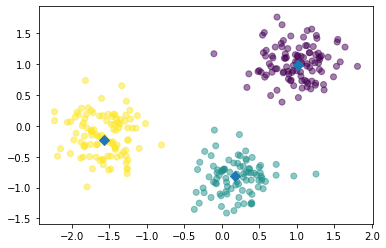

In [156]:
# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c = labels, alpha = 0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50)
plt.show()

The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering ?

### Grains

In [157]:
# import data
grains = pd.read_csv(r"C:\Users\ashupatel\Desktop\Office\Work\CogTax\DataCamp\Grains\seeds.csv")

# drop the last grains columns
grains_data = grains.drop(grains.columns[-1], axis = 1)

#### Choosing the number of clusters

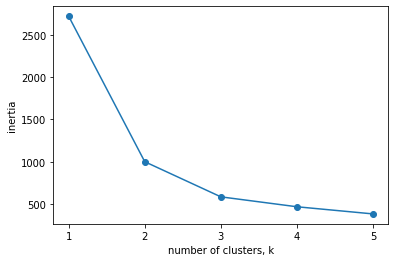

In [158]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    
    # Fit model to samples
    model.fit(grains_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

#### Evaluating the grain clustering

In [159]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters= 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(grains)

# create varieties list
varieties = []
for i in grains.iloc[:, -1]:
    if i == 1:
        varieties.append("Kama")
    if i == 2:
        varieties.append("Rosa")
    if i == 3:
        varieties.append("Canadian")

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian  Kama  Rosa
labels                         
0                 0    63    10
1                70     5     0
2                 0     1    60


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. Canadian is well seprated and clustered whereas there is slight overlap between Kama and Rosa. But depending on the type of data you are working with, the clustering may not always be this good. We will see what to do in that situation ?

### Fish Dataset

In [160]:
fish = pd.read_csv(r"C:\Users\ashupatel\Desktop\Office\Work\CogTax\DataCamp\fish.csv")

fish_data = fish.drop(fish.columns[0], axis = 1)
species = fish.iloc[:, 0]

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(fish_data)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_data)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({"labels": labels, "species": species})

# Create crosstab: ct
ct = pd.crosstab(df["labels"], df["species"])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            0     0     19      1


### Stocks Dataset

In [144]:
stocks = pd.read_csv(r"C:\Users\ashupatel\Desktop\Office\Work\CogTax\DataCamp\company-stock-movements-2010-2015-incl.csv")
stocks_data = stocks.drop(stocks.columns[0], axis = 1)
companies = stocks.iloc[:, 0]

In [145]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(stocks_data)

# Predict the cluster labels: labels
labels = pipeline.predict(stocks_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
44       0                        Schlumberger
35       0                            Navistar
49       0                               Total
43       0                                 SAP
39       0                              Pfizer
53       0                       Valero Energy
13       0                   DuPont de Nemours
12       0                             Chevron
10       0                      ConocoPhillips
16       0                   General Electrics
8        0                         Caterpillar
57       0                               Exxon
42       0                   Royal Dutch Shell
32       0                                  3M
56       1                            Wal-Mart
28       1                           Coca Cola
27       1                      Kimberly-Clark
25       1                   Johnson & Johnson
54       1                            Walgreen
38       1                               Pepsi
9        1   